# Metal Bands - Descriptive Analysis

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In this assignment I will look at a dataset of metal band information scraped in 2017 from Encyclopedia Metallum.

The Github link can be found here: https://github.com/MartimLou95/Everything_Counts

Let's create a variable *metal* that reads the .csv file while specifying its encoding to avoid reading errors.

In [208]:
# Let us import the .csv file as a variable called metal
metal = pd.read_csv ('metal_bands_2017.csv', encoding='latin-1')

In [209]:
metal

,id,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


## Part 1 - Data Cleaning

As you can see, the first column 'id' is not needed for our analysis, since it duplicates information already available in the index. 

Let's drop it before proceeding.

In [212]:
metal = metal.drop('id', axis=1)

In [213]:
metal

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [214]:
metal.head(20)

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,Slayer,2955,1981,United States of America,1981,Thrash
6,Death,2690,1983,United States of America,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,United States of America,1985,Progressive
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


---

We can see that on the *split* column there are dates missing, presumably due to the fact that those bands were deemed still active in 2017.

This makes me think that the Data Type of *split* is being read as an object.

Since I want to do statistical summaries of all the numerical columns, I'd prefer it to be read as an integer. 

Let's confirm this is the case by checking the Data Types in *metal* using the .info() function.

In [216]:
metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  5000 non-null   object
 1   fans       5000 non-null   int64 
 2   formed     5000 non-null   object
 3   origin     4992 non-null   object
 4   split      5000 non-null   object
 5   style      5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


---

The situation is worse than I expected.

Not only the column *split* is being read as an object, but so is the column *formed*, and there are 8 counts of null in *origin*, which I would rather not have so every band has the same amount of information available for analysis.

However we must not panic, and carry on.

First, let's drop all rows with NaN in the origin column, so we only do origin analysis in bands we have origin information of.


In [218]:
metal = metal.dropna()
metal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4992 non-null   object
 1   fans       4992 non-null   int64 
 2   formed     4992 non-null   object
 3   origin     4992 non-null   object
 4   split      4992 non-null   object
 5   style      4992 non-null   object
dtypes: int64(1), object(5)
memory usage: 273.0+ KB


---

Now let's inspect these numeric columns that are being read as objects, and switch their data type to float64 by changing every '-' to NaN.

In [220]:
# Check that '-' is the only non-numerical value present, before replacing it and converting column to float64
metal['split'].unique()

array(['-', '1990', '1983', '1981', '2001', '1985', '1996', '1969',
       '2003', '1989', '2016', '1995', '1991', '1993', '2004', '1988',
       '1994', '1980', '2010', '1984', '1997', '1973', '2000', '1975',
       '1999', '1987', '1968', '1979', '1992', '2002', '1965', '2005',
       '2008', '1978', '1982', '1998', '1976', '1986', '2006', '2011',
       '2007', '2014', '1972', '2015', '2013', '2009', '1967', '1977',
       '2012', '1974'], dtype=object)

In [221]:
# Replace '-' in 'split' column to NaN
metal['split'] = metal['split'].replace('-', np.nan)

/var/folders/kq/rscdfylj3nz7t2g90p35zfq80000gn/T/ipykernel_27348/1715154115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal['split'] = metal['split'].replace('-', np.nan)


In [222]:
# Convert to float64
metal['split'] = pd.to_numeric(metal['split'], errors='raise')

/var/folders/kq/rscdfylj3nz7t2g90p35zfq80000gn/T/ipykernel_27348/3611052715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal['split'] = pd.to_numeric(metal['split'], errors='raise')


In [223]:
# Verify all changes have been done
print(metal['split'].head())
print(metal['split'].unique())

0       NaN
1    1990.0
2       NaN
3    1983.0
4       NaN
Name: split, dtype: float64
[  nan 1990. 1983. 1981. 2001. 1985. 1996. 1969. 2003. 1989. 2016. 1995.
 1991. 1993. 2004. 1988. 1994. 1980. 2010. 1984. 1997. 1973. 2000. 1975.
 1999. 1987. 1968. 1979. 1992. 2002. 1965. 2005. 2008. 1978. 1982. 1998.
 1976. 1986. 2006. 2011. 2007. 2014. 1972. 2015. 2013. 2009. 1967. 1977.
 2012. 1974.]


---

IT WORKS! Phew, that was a close one.

Now let's do the same for the column 'formed'.

In [225]:
metal['formed'].unique()

array(['1975', '1990', '1981', '1983', '1988', '1985', '1968', '1996',
       '1993', '1969', '1984', '1989', '1995', '1991', '1982', '2004',
       '1997', '1978', '2002', '1999', '1994', '1987', '1992', '1980',
       '1973', '2000', '1998', '2003', '1986', '1979', '2001', '2007',
       '2008', '1965', '2005', '1976', '1964', '1972', '2006', '1977',
       '2011', '2010', '2013', '2009', '1971', '1967', '2015', '2012',
       '2014', '1970', '1974', '2016', '-'], dtype=object)

In [226]:
metal['formed'] = metal['formed'].replace('-', np.nan)
metal['formed'] = pd.to_numeric(metal['formed'], errors='raise')
print(metal['formed'].unique())

[1975. 1990. 1981. 1983. 1988. 1985. 1968. 1996. 1993. 1969. 1984. 1989.
 1995. 1991. 1982. 2004. 1997. 1978. 2002. 1999. 1994. 1987. 1992. 1980.
 1973. 2000. 1998. 2003. 1986. 1979. 2001. 2007. 2008. 1965. 2005. 1976.
 1964. 1972. 2006. 1977. 2011. 2010. 2013. 2009. 1971. 1967. 2015. 2012.
 2014. 1970. 1974. 2016.   nan]


/var/folders/kq/rscdfylj3nz7t2g90p35zfq80000gn/T/ipykernel_27348/2319893657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal['formed'] = metal['formed'].replace('-', np.nan)
/var/folders/kq/rscdfylj3nz7t2g90p35zfq80000gn/T/ipykernel_27348/2319893657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal['formed'] = pd.to_numeric(metal['formed'], errors='raise')


In [227]:
metal.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"New wave of british heavy,Heavy"
1,Opeth,4147,1990.0,Sweden,1990.0,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981.0,United States of America,NaN,"Heavy,Bay area thrash"
3,Megadeth,3105,1983.0,United States of America,1983.0,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988.0,Sweden,NaN,Melodic death


---
Before proceeding with analysis we should have a look at the value count of the column *band_name* to make sure we don't have any duplicates.

In [229]:
metal['band_name'].value_counts()

band_name
Iron Maiden          2
Kamelot              2
Helloween            2
Testament            2
Epica                2
                    ..
Alarum               1
Winter               1
Visceral Bleeding    1
Tremonti             1
Axis Of Despair      1
Name: count, Length: 4941, dtype: int64

Whoops, we have lots of duplicate bands in this dataset.

Let's make sure they are all dropped before proceeding.

In [231]:
# Create a variable called duplicates so we can have a look at them
duplicates = metal['band_name'].duplicated()

In [232]:
metal[duplicates]

,band_name,fans,formed,origin,split,style
50,Iron Maiden,4195,1975.0,United Kingdom,NaN,"New wave of british heavy,Heavy"
51,Opeth,4147,1990.0,Sweden,1990.0,"Extreme progressive,Progressive rock,Progressive"
52,Metallica,3712,1981.0,United States of America,NaN,"Heavy,Bay area thrash"
53,Megadeth,3105,1983.0,United States of America,1983.0,"Thrash,Heavy,Hard rock"
54,Amon Amarth,3054,1988.0,Sweden,NaN,Melodic death
55,Slayer,2955,1981.0,United States of America,1981.0,Thrash
56,Death,2690,1983.0,United States of America,2001.0,"Progressive death,Death,Progressive thrash"
57,Dream Theater,2329,1985.0,United States of America,1985.0,Progressive
58,Black Sabbath,2307,1968.0,United Kingdom,NaN,"Doom,Heavy,Hard rock"
59,Nightwish,2183,1996.0,Finland,1996.0,"Symphonic power,Gothic,Symphonic"


In [233]:
# Delete all duplicates, then check the duplicates sum is 0
metal = metal.drop_duplicates()
metal.duplicated().sum()

0

---

All done! Now let's get to it...

## Part 2 - Data Analysis

In [236]:
# We can start by having a look at the top 5 rows of the cleaned dataframe
metal.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"New wave of british heavy,Heavy"
1,Opeth,4147,1990.0,Sweden,1990.0,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981.0,United States of America,NaN,"Heavy,Bay area thrash"
3,Megadeth,3105,1983.0,United States of America,1983.0,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988.0,Sweden,NaN,Melodic death


In [237]:
# Let's do an analysis of the column 'fans', to see the distribution of the data
metal['fans'].describe()

count    4942.000000
mean       70.381222
std       229.014587
min         0.000000
25%         4.000000
50%        11.000000
75%        41.000000
max      4195.000000
Name: fans, dtype: float64

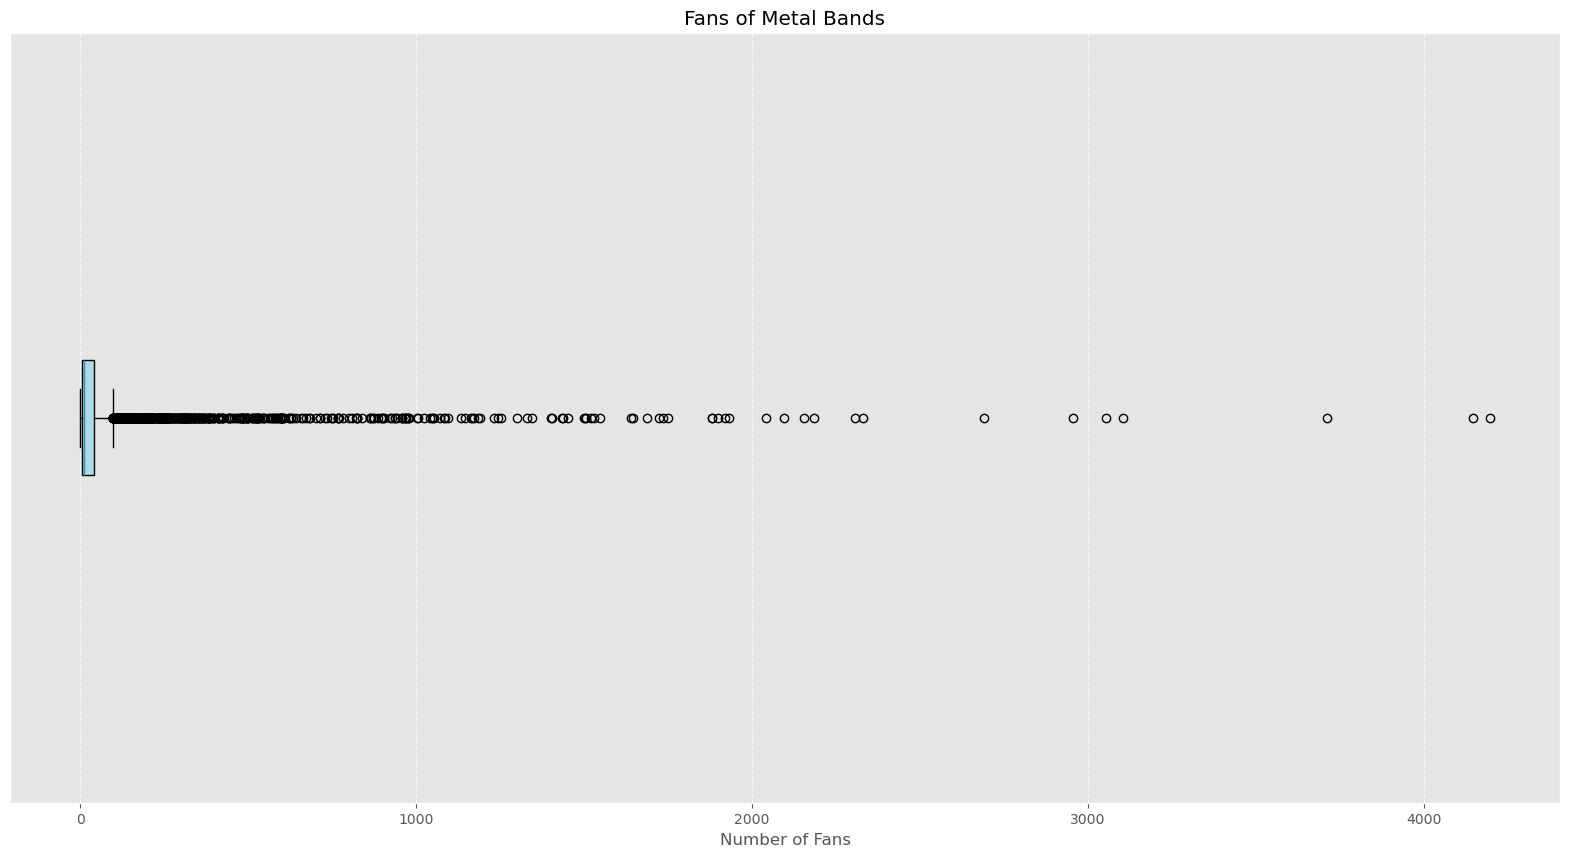

In [238]:
# Now we create a horizontal box plot for the 'fans' column to visualise the distribution
plt.figure(figsize=(20, 10))
plt.boxplot(metal['fans'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.yticks([]) 
plt.title('Fans of Metal Bands')
plt.xlabel('Number of Fans')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The data presents a long-tail distribution where a small number of bands have a disproportionately large number of fans, while the majority have very few. 

Bands below the 50th percentile have 11 fans or less, and a few super popular bands dominate the top.

---

Now let's have a look at the years the bands were formed.

In [276]:
# Let's look at the column 'formed'
metal['formed'].describe()

count    4938.000000
mean     2000.514581
std         8.820188
min      1964.000000
25%      1995.000000
50%      2002.000000
75%      2007.000000
max      2016.000000
Name: formed, dtype: float64

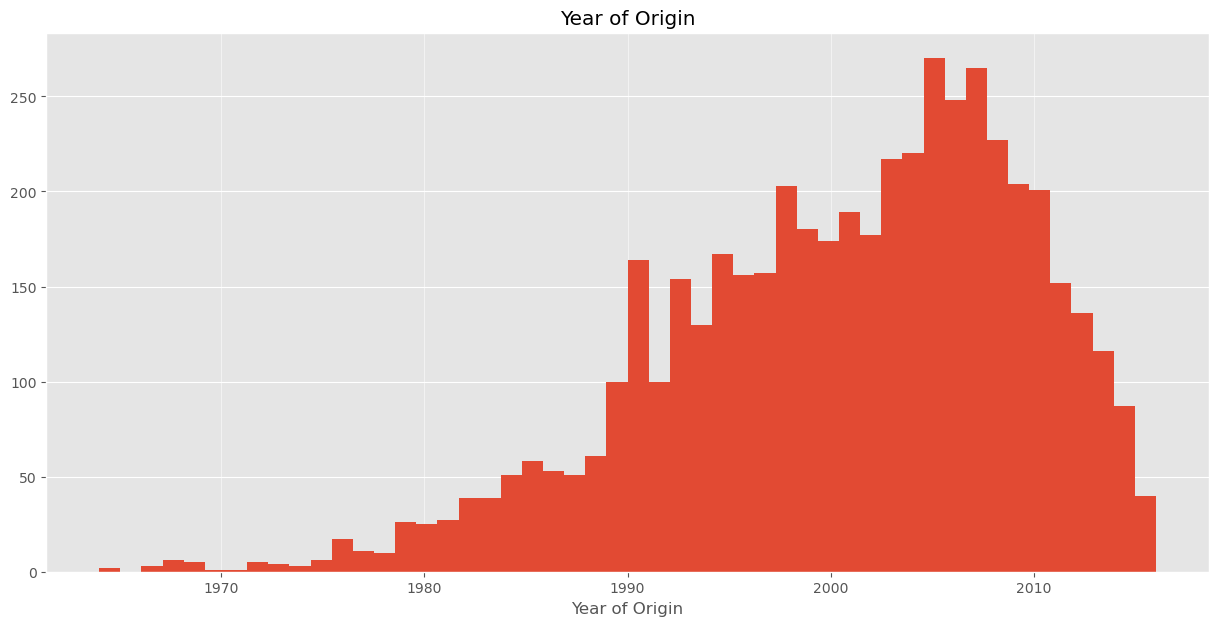

In [282]:
plt.figure(figsize=(15, 7))
plt.hist(metal['formed'], bins = 50)
plt.title('Year of Origin')
plt.xlabel('Year of Origin')
plt.grid(axis='x', alpha=0.5)
plt.show()

The data appears normally distributed with most band origin years clustering around 2000.

The mean of the year 2000 suggests that the average metal band in the dataset was formed at the turn of the millennium.

Most bands were formed in the 12-year period from 1995 to 2007, reflecting a big surge of new metal bands during this time.

---

Now let's look at the subgenres of these metal bands, to find what are the top 10 Metal Styles.



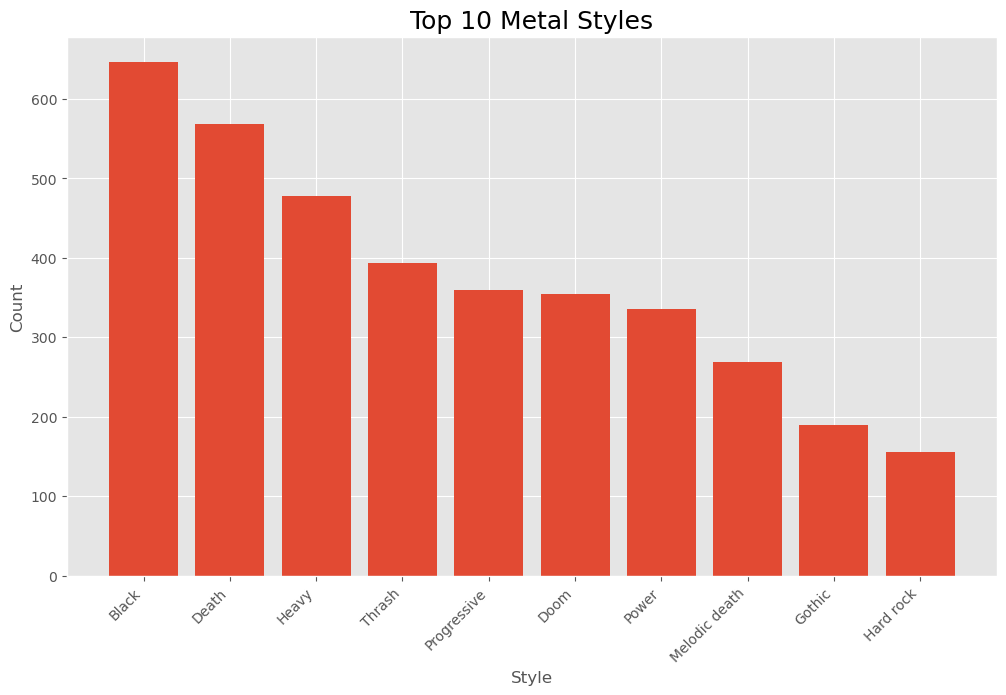

In [295]:
# Split metal styles into individual entries and explode the list into rows
styles = metal['style'].dropna().str.split(',').explode()

# Count occurrences of each style and select the top 10
style_counts = styles.value_counts().head(10)

# Plot the top 10 metal styles
plt.figure(figsize=(12, 7))
plt.bar(style_counts.index, style_counts.values)
plt.title('Top 10 Metal Styles', fontsize=18)
plt.xlabel('Style', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In this graph we can see the dataset presents a higher count of Black metal bands than any other genre, a surprising find given that I'm a death metal head and black metal is a somewhat obscure subgenre best left to the Scandinavians in my professional metalhead experience.

Somehow, Hard Rock makes into the Top 10, even though most metal lovers would agree it's a subgenre of Rock, as in the 'Hard' style of Rock.

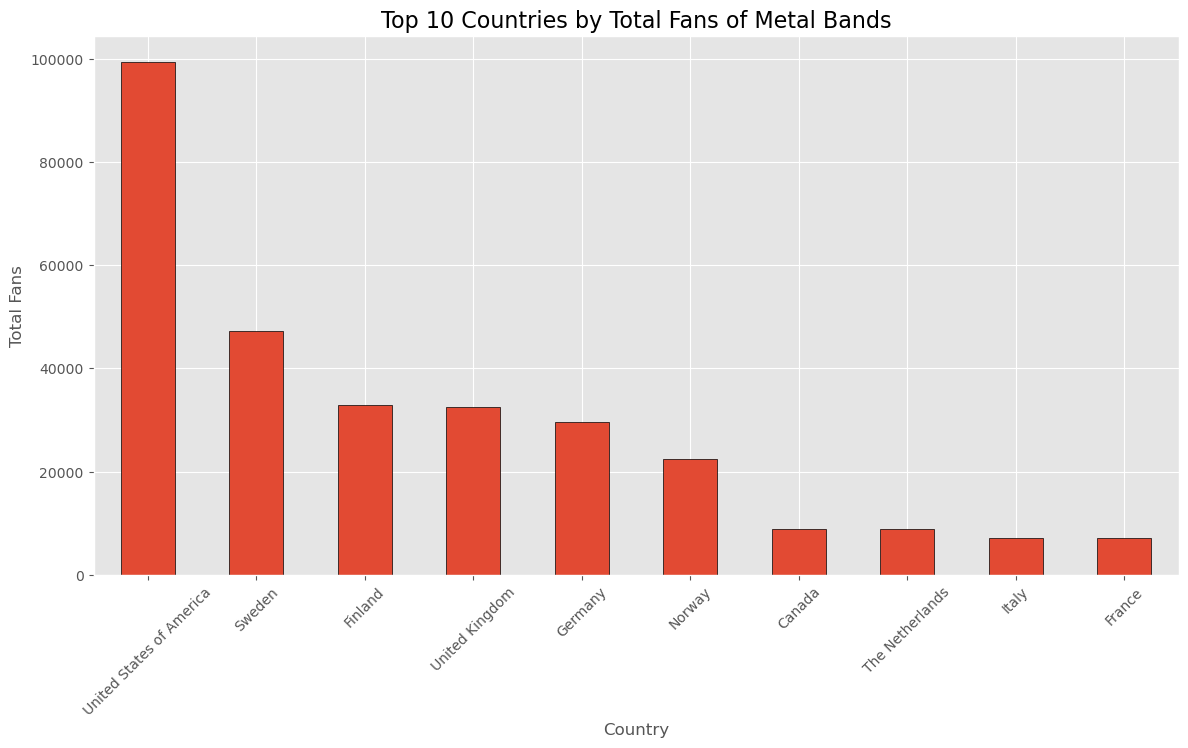

In [298]:
# Create a new variable that groups both columns and sorts their values by higher fans first
fans_by_origin = metal.groupby('origin')['fans'].sum().sort_values(ascending=False).head(10)

# Plot the data in a histogram
plt.figure(figsize=(14, 7))
fans_by_origin.plot(kind='bar', edgecolor='black')
plt.title('Top 10 Countries by Total Fans of Metal Bands', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Fans', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Interestingly, we find Sweden and Finland in the top 3 countries right after the USA, perhaps due to the fact that the data originates from a website that is particularly popular in scandinavian countries - explaining why there are more people interested in registering as fans of Swedish and Finland bands.

I hope this was a fun ride in the metal world, rock on! 

\m/ (",) \m/



# FIN